# Hogwarts High
## Collating the British and American versions of Harry Potter

### Introduction

It is a well-known fact that the Harry Potter novels initially appeared in a so-called "British version" (UK), which was subsequently edited into an "American version" (VS). There are at least two intriguing aspects to this:

- Rowling worked **herself**, with her American editor, on the US version; thus, she can be said to have endorsed or even "authorized" the changes. Because of this, one could easily claim that the US version should not be considered a mere derivative of a "more original, authentic" UK version.
- The changes are relatively **frequent** and sometimes fairly far-reaching: they involve much more than just superficial modifications, e.g. on the level of orthography. Especially, the many (seemingly unnecessary) stylistic interventions are striking (see below) and they are not always easy to account for on the basis of straightforward cultural differences.

One extremely complicating matter is that the differences between the US and UK versions are not the only differences  that have to be taken into account. Throughout the years, Rowling and her publishers made numerous adaptations to the text, for instance, emendations that corrected obvious mistakes in the plot (consult e.g. [this semi-official list](https://www.hp-lexicon.org/differences-changes-text/)). Although Bloomsbury, her UK publishing house, has published a partial list of the "official" changes (by 2004), it is clear that this list is not exhaustive, so that the latest versions contain a curious mix of both **"canonical" and "apocryphal" variants**. Especially interesting (from the point of view of **stemmatology**, see below), is that some changes were originally made in the US version before making their way into subsequent re-editions of the UK versions. In editorial theory, this phenomenon is known as **contamination**, i.e. the genetic process where (initially independent) lines of textual offspring start to influence or contaminate each other. This should again raise the awareness with the reader that the UK version should necessarily be considered more "original" or "authentic" with respect to the US version -- one cannot easily claim *precedence* over the other.

This makes the study of the Potter variants, official and non-official alike, very convoluted. Powerful **mediating institutions**, like *amazon.com* for instance, moreover make it surprisingly difficult to retrieve specific (e.g. original) versions of the books, let alone in an electronic format. Recent bibliographic studies on Rowling do not help much in this respect and provide no reasonably detailed "stemma" or genetic tree of the different versions which have been published.

There has been some previous research into the matter, for example, the excellent article by Philip Nel that we use as a basis for this chapter:

> Philip Nel, "You Say 'Jelly,' I Say 'Jell-O'?: Harry Potter and the Transfiguration of Language." *The Ivory Tower and Harry Potter: Perspectives on a Literary Phenomenon*, ed. Lana Whited. Columbia and London: University of Missouri Press, pp. 261-84.

However, while Nel does a great job at inventorizing and interpreting numerous differences between the US and UK version (especially from the point of view of "intralingual, but intercultural translation"), it is clear that he essentially relies on a manual comparison of the books. By necessity, such a laborious exercise must be limited to a small selection or **sample**, compiled during a sustained close reading. For other readers and scholars, it can be hard to assess whether the sample of items is truly representative -- which differences were left out? -- and what the **exact criteria** for inclusion in the discussion were. Moreover, Nel's analysis is qualitative rather than quantitative and considerations of a more empirical nature are notably absent: we do not get to see which books of the series were more heavily edited than others or which *sort* of edits were more common than others.

### Collation
Here, it is clear that we assume the role of the Devil's advocate in an attempt to introduce the added value which digital methods and distant reading might bring to this debate. We will turn to a popular methodology called **collation** that allows us to provide a higher-level **macroanalysis** of some the deviations between the US and UK version. Collation, in the context of (digital) literary studies, refers to the process where scholars compare and align different versions of the same text, for instance, for the sake of producing an edition with a **critical apparatus**. A prototypical example where collation is useful is that of a medieval text that survives in a large number of manuscripts or "witnesses", which all show (subtle) deviations from each other. In such a case, critics might want to reconstruct the **stemma codicum** of the manuscripts, i.e. establishing a family tree that models which books were in all likelihood copied from which other(s).

Especially in earlier times, this was often done using the so-called **Lachmannian method**, named after its inventor, the nineteenth-century German critic [Karl Lachmann](https://en.wikipedia.org/wiki/Karl_Lachmann). According to this method, it is possible to determine which manuscripts were copied from one another, by looking at the errors which they have in common (i.e. the **Principle of the Common Errors**). While still influential, this view is not entirely uncontested nowadays, partly because it can be difficult for modern readers to determine what exactly constitutes an "error".

Collation has been -- and continues to be -- an important application in Digital Humanities and the advantages of computers for (semi-)automatic tools were recognized very early in the field. Traditionally, collation was often carried out in a **pairwise fashion**, where the extant copies of a text were aligned with a so-called **base manuscript**, that would serve as the reliable point of reference for an edition. Nowadays, this setup has become less common in textual scholarship. People often try to postpone the choice for a single base text (the *Urtext*) and instead align multiple versions of a text at the same time. Another shift has been that collation previously mostly happened at the level of individual words (often called 'tokens'), whereas modern scholarship increasingly is interested in character-level alignment too.

In this chapter we will:
1. Load a version of the Harry Potter texts in a handy, nested format
2. Look into some very general differences between the US and UK version
3. Use the stand-alone Java tool `CollateX` to perform a simple collation of the opening chapter of the series
4. (Manually look into the Levenshtein metric, one influential historic method in alignment studies)
5. Turn to Python to expand the scope of our collation, using the Python port of Collatex
6. Establish a simple "ontology" of the sort of edits we find
7. Measure whether the profile of the edits has changed throughout the books.

## General statistics

In the code block below, we parse a ready-made TEI version of the British and American version of the Harry Potter series into two Python objects, `UK` and `US`:

In [3]:
import os
import glob
from collections import OrderedDict

namespaces = {'tei':'http://www.tei-c.org/ns/1.0'}

def load_potter(indir):
    HP = OrderedDict() # preserves the order in which the keys are inserted
    for book_dir in sorted(glob.glob(f'{indir}/*/')):
        book = os.path.basename(book_dir[:-1])
        book = book.split('-')[-1].replace('_', ' ')
        print(book)
        HP[book] = OrderedDict()
        for chapter_file in sorted(glob.glob(f'{book_dir}*.txt')):
            chapter = os.path.basename(chapter_file).replace('.txt', '')
            chapter = chapter.split('-')[-1].replace('_', ' ')
            print('  -', chapter)
            HP[book][chapter] = []
            for line in open(chapter_file):
                HP[book][chapter].append(line.strip().split())
                
    return HP # what are we returning here?

UK = load_potter('hp_uk_plain_chapters_segm')
US = load_potter('hp_us_plain_chapters_segm')

print(UK['Harry Potter and the Philosopher s Stone']['The Boy Who Lived'][5])

Harry Potter and the Philosopher s Stone
  - The Boy Who Lived
  - The Vanishing Glass
  - The Letters from No One
  - The Keeper of the Keys
  - Diagon Alley
  - Quarters
  - The Sorting Hat
  - The Potions Master
  - The Midnight Duel
  - Hallowe’en
  - Quidditch
  - The Mirror of Erised
  - Nicolas Flamel
  - Norbert the Norwegian Ridgeback
  - The Forbidden Forest
  - Through the Trapdoor
  - The Man with Two Faces
Harry Potter and the Chamber of Secrets
  - The Worst Birthday
  - Dobby’s Warning
  - The Burrow
  - At Flourish and Blotts
  - The Whomping Willow
  - Gilderoy Lockhart
  - Mudbloods and Murmurs
  - The Deathday Party
  - The Writing on the Wall
  - The Rogue Bludger
  - The Duelling Club
  - The Polyjuice Potion
  - The Very Secret Diary
  - Cornelius Fudge
  - Aragog
  - The Chamber of Secrets
  - The Heir of Slytherin
  - Dobby’s Reward
Harry Potter and the Prisoner of Azkaban
  - Owl Post
  - Aunt Marge’s Big Mistake
  - The Knight Bus
  - The Leaky Cauldron
  - Th

Now that we have loaded the Harry Potter texts into our notebooks, we can already make some exploratory, high-level plots of the book series. When looking at the Harry Potter series in a book store, for instance, it is clear that Rowling's books seem to have become longer:

![alt text](http://ecx.images-amazon.com/images/I/51BRMauPcNL.jpg "Logo Title Text 1")

Let us warm up a little, through making some simple plots that help us verify these impressions. For this this we make use of an established plotting library in Python, called `matplotlib`, which we import using the **alias** `plt`. To make sure that everything gets displayed correctly, and in a pleasing style, in our notebook, we first need to execute the block below.

In [5]:
%matplotlib inline
import matplotlib.style
matplotlib.style.use('seaborn-deep') # load a style
import matplotlib.pyplot as plt

The easiest way to measure the length of a book is to simply **count the total number of characters** it contains. For the UK books, for instance, we can first loop over the books in `UK`, then over the chapter and then over the paragraphs. For each book, we keep track of the number of characters it contains in a list of integers which we call `uk_len`:

In [7]:
uk_len = []

for uk_book in UK:
    
    uk_cnt = 0
    for uk_chap in UK[uk_book]:
        for sent in UK[uk_book][uk_chap]:
            uk_text = ' '.join(sent) # join items of list into a single string
            uk_cnt += len(uk_text)
    
    uk_len.append(uk_cnt)

print(uk_len)

[451487, 505811, 644377, 1134095, 1534073, 1012515, 1175318]


From these numbers, it becomes clear already that the Harry Potter books, at least in the UK version, have grown significantly longer. We can now draw a block to visualize this information. Most of the commands used below should be intuitive enough to make sense to you (e.g. adding a legend and axis labels etc.).

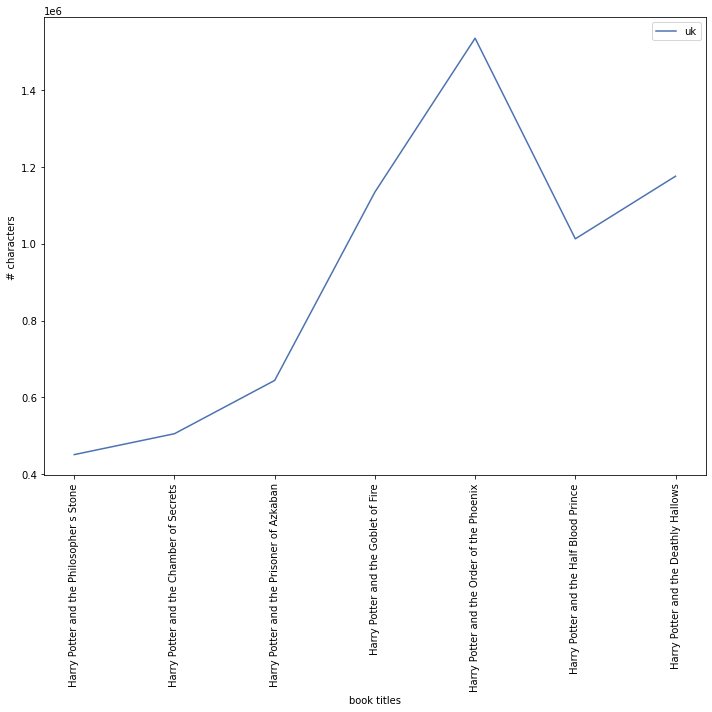

In [8]:
plt.figure(figsize=(10, 10))
plt.plot(uk_len, label='uk')
plt.ylabel('# characters')
plt.xlabel('book titles')
plt.xticks(range(len(uk_len)), UK.keys(), rotation='vertical')
plt.legend()
plt.tight_layout()

This simple **line plot** visually confirms our expectation: ever since the relatively shorter *Philosopher's Stone*, the books have grown considerably larger. Although the *Half-Blood Prince* somewhat countered this trend, the finale of the series grows longer again - and both concluding volumes are clearly longer than the opening three items in the series. The fifth item, the *Phoenix* reaches the maximum length in characters -- and, as will we see later, this is not the only respect in which the *Phoenix* seems to play an exceptional role in the development of the series. Funnily, Rowling recently tweeted that in her *Cormoran Strike* series too, the "fourth book" would be the longest there as well:

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">It progresses. Turns out the fourth in every one of my series has to be the longest. 🙄 <a href="https://t.co/cnXl2Qju6Y">https://t.co/cnXl2Qju6Y</a></p>&mdash; J.K. Rowling (@jk_rowling) <a href="https://twitter.com/jk_rowling/status/958376528643002370?ref_src=twsrc%5Etfw">January 30, 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

According to our numbers, the fourth book in the Harry Potter series does have the largest number of chapters (see below), but it was *not* the longest in terms of length in characters...

Literary scholars might easily interpret this development in terms of Rowling's growing success: ever since her books became international bestsellers, she must have obtained more leeway and artistic freedom with her editors, allowing her to create longer books, since the publisher could trust on the success of the upcoming items in the series, so no aggressive truncation of the narrative was needed. This is also evident from the number of chapters contained in the book. Using a simple **list comprehension** we retrieve the length of each book in terms of the number of chapters it contains.

In [11]:
chap_len = [len(UK[t]) for t in UK]
print(chap_len)

[17, 18, 22, 37, 38, 30, 37]


Plotting this information requires only minor adjustments to our previous plotting block. Can you see which bits we had to change?

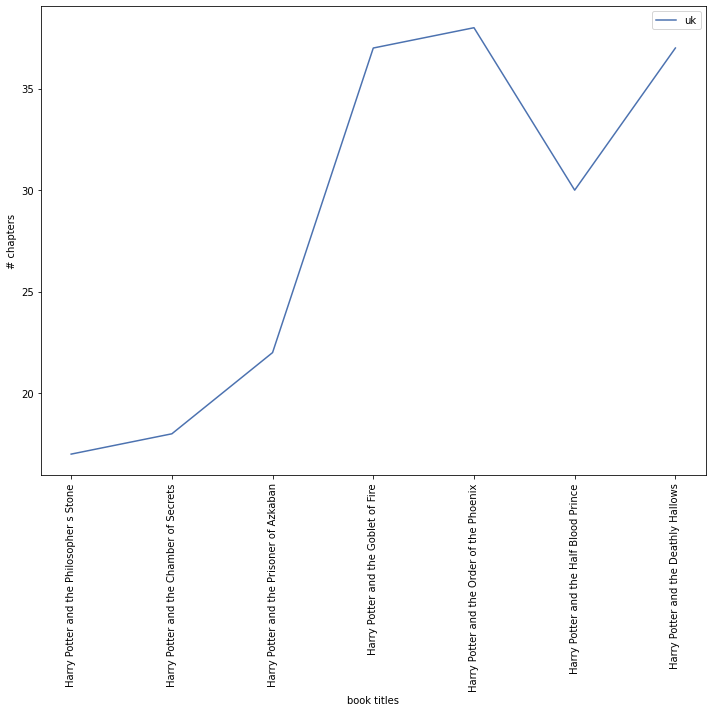

In [12]:
plt.figure(figsize=(10, 10))
plt.plot(chap_len, label='uk')
plt.ylabel('# chapters')
plt.xlabel('book titles')
plt.xticks(range(len(chap_len)), UK.keys(), rotation='vertical')
plt.legend()
plt.tight_layout()

Here, it is interesting how the evolution of the number of chapter per books closely parallels the overall length of the books -- which makes sense intuitively, at least if we assume that the average length of a chapter did not change radically.

#### Quiz
> Create the same plots (length of the books in characters and chapters), but now for the US version.

## Sentence length

**Readability** is a thorny issue in the international Rowling criticism, especially in the context of the difference between the UK and US versions. Reviewers, critics and readers alike have noted that many aspects of the US version seem to have been somewhat "simplified" in comparison to the UK version. Some critics have gone as far as claiming that this would constitute a pure act of "dumbing down" the books for a less intellectual American readership. Others might counter this naive view by arguing that such interventions might actually boost the stylistic qualities of the books. One crude, yet insightful way to quantify such differences would be to inspect the average length of sentences in the books. Would the length of sentences (i.e. the number of word tokens they contain), on average, indeed be shorter in the UK than in the US version?

If we glue these components together, we are now ready to verify whether the UK and US versions indeed deviate significantly from each other in terms of the average number of words used in a sentence. Using the `zip` function below, we now loop over the books and chapter in the UK and US version simultaneously. (Note, of course, that the number of chapters have never changed in the UK and US version.) Using the `mean` function, from the `statistics` module in Python's **standard library**, we collect for each book its average sentence length.

In [15]:
import re
from statistics import mean

uk_len, us_len, uk_titles  = [], [], []
#DOTS = re.compile(r'(\s*)\.(\s*)\.(\s*)\.(\s*)') # meaning?

for uk_book, us_book in zip(UK, US):
    print(uk_book, 'vs', us_book)
    uk_titles.append(us_book)
    
    uk_cnt, us_cnt = [], []
    for uk_chap, us_chap in zip(UK[uk_book], US[us_book]):
        
        for sent in UK[uk_book][uk_chap]:
            uk_cnt.append(len(sent))
        
        for sent in US[us_book][us_chap]:
            us_cnt.append(len(sent))
    
    # now average at book level
    uk_len.append(mean(uk_cnt))
    us_len.append(mean(us_cnt))

print(uk_len)
print(us_len)

Harry Potter and the Philosopher s Stone vs Harry Potter and the Sorcerer s Stone
Harry Potter and the Chamber of Secrets vs Harry Potter and the Chamber of Secrets
Harry Potter and the Prisoner of Azkaban vs Harry Potter and the Prisoner of Azkaban
Harry Potter and the Goblet of Fire vs Harry Potter and the Goblet of Fire
Harry Potter and the Order of the Phoenix vs Harry Potter and the Order of the Phoenix
Harry Potter and the Half Blood Prince vs Harry Potter and the Half Blood Prince
Harry Potter and the Deathly Hallows vs Harry Potter and the Deathly Hallows
[20.47808358817533, 21.47773672953529, 21.229411764705883, 23.588569229288943, 26.55166867712103, 26.6887092823904, 24.65491183879093]
[20.457613336043913, 21.30837173579109, 21.009847806624887, 22.634071739734914, 26.30576141525221, 26.15573378022504, 24.284158226638638]


In [16]:
import pandas as pd
df = pd.DataFrame(list(zip(uk_titles, uk_len, us_len)), columns=('titles', 'uk', 'us'))
df

,titles,uk,us
0,Harry Potter and the Sorcerer s Stone,20.478084,20.457613
1,Harry Potter and the Chamber of Secrets,21.477737,21.308372
2,Harry Potter and the Prisoner of Azkaban,21.229412,21.009848
3,Harry Potter and the Goblet of Fire,23.588569,22.634072
4,Harry Potter and the Order of the Phoenix,26.551669,26.305761
5,Harry Potter and the Half Blood Prince,26.688709,26.155734
6,Harry Potter and the Deathly Hallows,24.654912,24.284158


In [19]:
df['diff'] = df['uk'] - df['us']
df

,titles,uk,us,diff
0,Harry Potter and the Sorcerer s Stone,20.478084,20.457613,0.020470
1,Harry Potter and the Chamber of Secrets,21.477737,21.308372,0.169365
2,Harry Potter and the Prisoner of Azkaban,21.229412,21.009848,0.219564
3,Harry Potter and the Goblet of Fire,23.588569,22.634072,0.954497
4,Harry Potter and the Order of the Phoenix,26.551669,26.305761,0.245907
5,Harry Potter and the Half Blood Prince,26.688709,26.155734,0.532976
6,Harry Potter and the Deathly Hallows,24.654912,24.284158,0.370754


Plotting the numbers is very similar to what we have done before, only now, you can see that we call the `plot` function twice, to add a line in the plot for both the `UK` and `US` series.

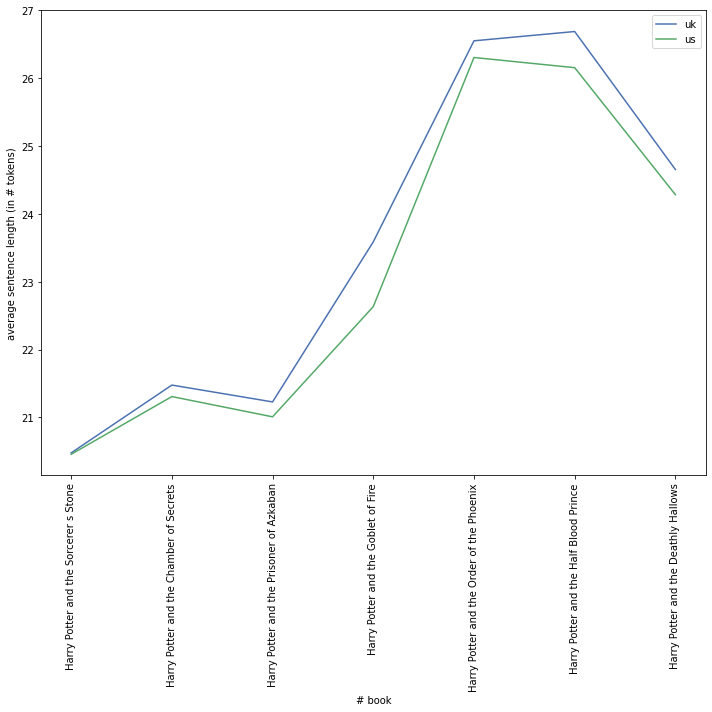

In [21]:
plt.figure(figsize=(10, 10))
plt.plot(uk_len, label='uk')
plt.plot(us_len, label='us')
plt.ylabel('average sentence length (in # tokens)')
plt.xlabel('# book')
plt.xticks(range(len(uk_titles)), uk_titles, rotation='vertical')
plt.legend()
plt.tight_layout()

The difference is striking: we can indeed observe that the US sentences *in each book* are a good deal shorter on average than their British counterparts. This difference grows even more pronounced in the later and longer books, where the US editors (and Rowling herself, apparently) seem to have felt an even stronger need to cut down on the average sentence length.

## Collation

So far, we have been relying on fairly crude and superficial metrics to compare the UK and US versions, e.g. average sentence length. This is indeed typical of much DH/DLS research, where scholars adopt a **distant or macroanalytical perspective** -- "dumb down, to scale up", so to speak. In the next section, however, we turn to a methodology that allows us to zoom in again on the text, in order to get a grasp of the *actual* microlevel differences that exist between both versions: (semi-)automatic collation. Let us start with a simple example and collate the first chapters of the UK and US version respectively.

For this we can make use of an external Java tool called [Collatex](https://collatex.net/), which is one of the more popular tools which are available for aligning and collating multiple (>=2) versions of the same text. This tool comes as single **jar-file** that you can download from the project's [website](https://collatex.net/) -- we used 1.7.1. (You should place this file in the same folder as this notebook.) Running this jar-file requires that you have a recent version of the **Java** programming language: if you don't (know whether you) have that, it's a good idea to download the correct version for your operating system [here](http://www.oracle.com/technetwork/java/javase/downloads/jdk8-downloads-2133151.html).

First, we will use `CollateX` from the command line, which is at this point still the most powerful and flexible interfaces to the software. For this, you can open a new command line window, navigate to the folder where you left the far, and type in the commands that follow below. Alternatively, you can just run the commands in the code blocks below -- through adding an exclamation mark (`!`) we indicate that those commands should be **executed in the notebook as if we executed them in the shell**. (If you do this from the notebook, however, please be well aware that we are no longer working in simple Python here, but that we switch to shell syntax!)

Below, we start by invoking the **help** or **documentation** for the jar-file, which will tell us, amongst others, what sort of input is expected from our side and which settings we can tweak. Some notes on the syntax of this command:
- `java` indicates that we want to run the program using the Java programming language
- `-jar` is a flag indicating that we run a (fully self-contained) jar-version of the Java program
- `collatex-tools-1.7.1.jar` is just the (relative) path to the actual jar file on our system
- `-h` is a flag that we use to print out the help documentation that comes with the jar

In [23]:
!java -jar collatex-tools-1.7.1.jar -h

usage: collatex [<options>]
                (<json_input> | <witness_1> <witness_2> [[<witness_3>] ...])
  -a,--algorithm <arg>                    progressive alignment algorithm to
                                          use 'dekker' (default), 'medite',
                                          'needleman-wunsch'
  -cp,--context-path <arg>                URL base/context path of the
                                          service, default: '/'
  -dot,--dot-path <arg>                   path to Graphviz 'dot',
                                          auto-detected by default
  -f,--format <arg>                       result/output format: 'json', 'csv',
                                          'dot', 'graphml', 'tei'
  -h,--help                               print usage instructions
  -ie,--input-encoding <arg>              charset to use for decoding non-XML
                                          witnesses; default: UTF-8
  -mcs,--max-collation-size <arg>         maximum numbe

Running the program with the `-h` flag, returns a list of all the possible flags that we can use and their anticipated behavior or effect on the internal working of the tool -- this includes the documentation `-h` and `--help` flags themselves, as you can see. Most of these flags have so-called `default settings`, which means that, if we are happy with them, we do not have to explicitly set them each time we run the program.

Let us first dump a simple plain text version of the first chapters in both the UK and US version. In Python, this is as simple as:

In [25]:
with open('uk_chap1.txt', 'w') as f:
    text = ''
    for sent in UK["Harry Potter and the Philosopher s Stone"]['The Boy Who Lived']:
        text += ' '.join(sent) + ' '
    f.write(text)

with open('us_chap1.txt', 'w') as f:
    text = ''
    for sent in US["Harry Potter and the Sorcerer s Stone"]['THE BOY WHO LIVED']:
        text += ' '.join(sent) + ' '
    f.write(text)

If you inspect the contents of these newly created files in your text editor, you should see that they contain simple plain text. To now go and collate these texts, we can just add them as additional arguments.

In [27]:
!java -jar collatex-tools-1.7.1.jar uk_chap1.txt us_chap1.txt

{"witnesses":["w1","w2"],"table":[[["Mr "],["Mr"]],[[],[". "]],[["and ","Mrs "],["and ","Mrs"]],[[],[". "]],[["Dursley ",", ","of ","number ","four ",", ","Privet ","Drive ",", ","were ","proud ","to ","say ","that ","they ","were ","perfectly ","normal ",", ","thank ","you ","very ","much ",". ","They ","were ","the ","last ","people ","you ","’ ","d ","expect ","to ","be ","involved ","in ","anything ","strange ","or ","mysterious ",", ","because ","they ","just ","didn ","’ ","t ","hold ","with ","such ","nonsense ",". ","Mr "],["Dursley ",", ","of ","number ","four ",", ","Privet ","Drive ",", ","were ","proud ","to ","say ","that ","they ","were ","perfectly ","normal ",", ","thank ","you ","very ","much ",". ","They ","were ","the ","last ","people ","you ","’ ","d ","expect ","to ","be ","involved ","in ","anything ","strange ","or ","mysterious ",", ","because ","they ","just ","didn ","’ ","t ","hold ","with ","such ","nonsense ",". ","Mr"]],[[],[". "]],[["Dursley ","was ","th

This should print a rather large string to your console: because we did not specify an output file, the output of the program simply gets passed to the command line (or the so-called **standard output** route) in its entirety. To catch this output and send it to an actual file, there is a again a useful flag for this:

In [29]:
!java -jar collatex-tools-1.7.1.jar uk_chap1.txt us_chap1.txt --output chap1.json

If you open the resulting file in a text editor, you will see that the output in the file `chap1.json` has been formatted as **json**. As you know already, json is a format that allows us to express a number of data collection using a simply structure that is reminiscent of the way lists or dictionaries are used in Python. For now, have a look at the bit that follows `"table":`. Can you explain how the result of the collation of two **witnesses** or text versions is reflected in this data structure?

## The Python port

Since a couple of years, there exists also a sort of "rewrite" or **port** of CollateX to Python and we will now explore that -- the highly respected scholar Ronald Haentjens Dekker (Huygens ING) is the lead developer of the project. Apart from the fact that it interacts really well with Jupyter notebooks, this port comes with a number of intuitive ways to visualize the result of a collation, live in our browser. To install the Python port, executing the following block should suffice -- if you're lucky... Detailed installation instructions can be found [here](http://collatex.obdurodon.org/installation.xhtml), should anything go wrong. As you can see, we also include a **dependency** of Collatex, i.e. another package that `CollateX` relies on for some of its functionality. This dependency should be installed *before* you install Collatex.

In [43]:
!pip install graphviz
!pip install python-levenshtein
!pip install Collatex

`pip` is a tool that allows you to quickly install **third-party packages** that are publicly available (as opposed to the **standard library** that is a part of Python itself). Interestingly, `pip` tries to make sure that you download a version that plays nicely with your specific hardware and software.

Let us start with a really obvious but famous a example: the title of the very first Harry Potter book, which was modified, because people thought that the word "philosopher" would be to difficult for American children... We add a string representing each title as a witness, and have `CollateX` align those versions. We inspect the result in a so-called alignment table that visualizes the correspondences and deviations between our two witnesses:

In [44]:
from collatex import *

collation = Collation()

collation.add_plain_witness('UK', "Harry Potter and the Philosopher's Stone")
collation.add_plain_witness('US', "Harry Potter and the Sorcerer's Stone")

alignment_table = collate(collation)

print(alignment_table)

+----+----------------------+-------------+----------+
| UK | Harry Potter and the | Philosopher | 's Stone |
| US | Harry Potter and the | Sorcerer    | 's Stone |
+----+----------------------+-------------+----------+


As you can see, CollateX has correctly identified and aligned the parts in which both titles deviate (or match). Essentially, the result of an alignment is a long list of pairs, showing which parts in the first witness (`"UK"`) correspond to the second witness which we specified (`"US"`). We can iterate over these pairs as follows, if we want to postprocess the output:

In [36]:
for i in alignment_table.columns:
    for idx, tokens in i.tokens_per_witness.items():
        print(tokens)
    print('===')

[Harry, Potter, and, the]
[Harry, Potter, and, the]
===
[Sorcerer]
[Philosopher]
===
[', s, Stone]
[', s, Stone]
===


Another really fancy way to visualize the result of a collation is through the use of a **variant graph**. 

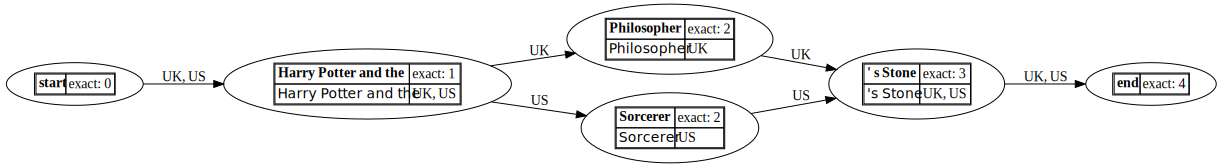

In [45]:
collate(collation, output="svg") # svg_simple, xml, csv, tsv, ...

In this view, a text is modelled as a **directed, (acyclical) graph** and a witness is viewed as one specific **path** or **traversal** of that graph. This model of texts is becoming increasingly popular -- even "hipster" -- in the world of digital scholarly editing and probably for good reasons -- see for instance [this abstract](https://www.balisage.net/Proceedings/vol19/print/Dekker01/BalisageVol19-Dekker01.html). Even the acts of reading and editing a text can be viewed as a traversal of this graph, that allows you to switch or **oscillate** between different witnesses.

Finally, another highly readable manner to view the results of a collation is through a coloured table. In the next code block, we collate a slightly longer portion of text -- a fairly random segment from the *Prisoner of Azkaban*:

In [46]:
uk_chap = ' '.join([' '.join(s) for s in UK["Harry Potter and the Prisoner of Azkaban"]['Owl Post']])[:1000]
us_chap = ' '.join([' '.join(s) for s in US["Harry Potter and the Prisoner of Azkaban"]['OWL POST']])[:1000]

print(uk_chap)
print(us_chap)

Harry Potter was a highly unusual boy in many ways . For one thing , he hated the summer holidays more than any other time of year . For another , he really wanted to do his homework , but was forced to do it in secret , in the dead of night . And he also happened to be a wizard . It was nearly midnight , and he was lying on his front in bed , the blankets drawn right over his head like a tent , a torch in one hand and a large leather-bound book ( A History of Magic , by Bathilda Bagshot ) propped open against the pillow . Harry moved the tip of his eagle-feather quill down the page , frowning as he looked for something that would help him write his essay , ‘ Witch-Burning in the Fourteenth Century Was Completely Pointless – discuss ’ . The quill paused at the top of a likely-looking paragraph . Harry pushed his round glasses up his nose , moved his torch closer to the book and read : Non-magic people ( more commonly known as Muggles ) were particularly afraid of magic in medieval time

 Note that this will take a while to run:

In [47]:
collation = Collation()
collation.add_plain_witness('UK', uk_chap)
collation.add_plain_witness('US', us_chap)
html_ = collate(collation, layout='vertical', output='html2')

In red, this alignment table shows the segments in which the witnesses deviate. At a glance, it becomes obvious that this take on distant reading, however modest, already surfaces interesting differences in a way that would be hard to achieve using traditional means of analysis. Some categories emerge:
- The bulk of deviations are fairly straightforward differences in orthography and punctuation that are not extremely interesting from a literary point of view (`neighbours` vs `neighbors`, `toward` versus `towards`);
- A second clear categories concerns words that have been replaced by a more American expression (e.g. `torch` versus `flashlight`; `holidays` versus `break`); in many cases, however the semantics of both items is close enough to still speak of (innocent?) **synonyms**;
- A third category of changes seem to be **stylistic**. The US version replaces "stomach" with "front", for instance: in such a case, it becomes harder to speak of pure synonymy, because a front and a stomach are not the exact same thing. The same is also, and perhaps even more true for the clarifying intervention to specify or add that "Harry pushed his round glasses up *the bridge of* his nose".

The latter category of interventions are much harder to interpret, since we go beyond a simple synonym replacement as the lexical level. Why on earth would one want to change "the Dursleys" to, simply, "they" in the US version? Or add intensifying adverbs such as `particularly` or `especially` in seemingly random sentences that weren't in dire need for these additions? This category will therefore be a focal aspect of our analysis below.

The previous section yielded some proof of concept that collation offers a fruitful methodology to inspect the differences between the UK and US versions at a larger scale. We are now ready to collate the entire series. However, one clear downside of the Python port is that it is much slower to run than the Java tool. In the code blocks below, we therefore first produce collations using the Java tool, which takes "only" a couple of hour to run on my laptop, whereas the Python version would have to run overnight. We dump the results as json files that we can load again later for postprocessing in Python. (You can skip the next few code blocks if you are not interested in running the actual collation yourself. We provide the dumps of the analysis so that you can with postprocessing them right away.)

In [63]:
import json
import subprocess

def java_alignment(uk_chap, us_chap):
    W = {'witnesses': [{'id': 'uk', 'content': uk_chap},
                       {'id': 'us', 'content': us_chap}]}
    
    with open('in.json', 'w') as f:
        f.write(json.dumps(W))

    subprocess.call("java -jar collatex-tools-1.7.1.jar in.json --output='out.json'", shell=True)
    
    with open('out.json', 'r') as f:
        alignment = json.loads(f.read())
    
    pairs = list(zip(*alignment['table']))
        
    uk = pairs[alignment['witnesses'].index('uk')]
    us = pairs[alignment['witnesses'].index('us')]

    return uk, us

(This takes forever.)

In [64]:
#%timeit java_alignment(uk_chap, us_chap)
#%timeit collate(collation, layout='vertical')

In [65]:
uk, us = java_alignment(uk_chap, us_chap)

In [66]:
for a, b in zip(uk, us):
    print(''.join(a), '<==>', ''.join(b))

Harry Potter was a highly unusual boy in many ways . For one thing , he hated the summer holidays more than any other time of year . For another , he really wanted to do his homework  <==> Harry Potter was a highly unusual boy in many ways . For one thing , he hated the summer holidays more than any other time of year . For another , he really wanted to do his homework 
,  <==> 
but was forced to do it in secret , in the dead of night . And he also happened to be a wizard . It was nearly midnight , and he was lying on his  <==> but was forced to do it in secret , in the dead of night . And he also happened to be a wizard . It was nearly midnight , and he was lying on his 
front  <==> stomach 
in bed , the blankets drawn right over his head like a tent , a  <==> in bed , the blankets drawn right over his head like a tent , a 
torch  <==> flashlight 
in one hand and a large leather-bound book ( A History of Magic  <==> in one hand and a large leather-bound book ( A History of Magic 
,  <

Now we can run the collation at the chapter level in bulk and dump the results to a list of simple json-files that we can postprocess later - without having to rerun the actual collation over and over again. One important gimmick which we add at this stage is that we tokenize the texts and add a so-called **end-of-sentence marker** (EOS) in between sentences. This will help us study how and where new sentence endings have been introduced in the US version (cf. sentence length).

```python
import os
import shutil

try:
    shutil.rmtree('collations')
except FileNotFoundError:
    pass
os.mkdir('collations')

cnt = 0
for uk_book, us_book in zip(UK, US):
    print(uk_book)
    
    for uk_chap, us_chap in zip(UK[uk_book], US[us_book]):
        print('   ', uk_chap)
        cnt += 1
        idx = str(cnt)
        while len(idx) < 3:
            idx = '0' + idx
        
        #uk_sents = [' '.join(s) for s in UK[uk_book][uk_chap][:50]]
        uk_sents = [' '.join(s) for s in UK[uk_book][uk_chap]]
        uk_text = ' <EOS> '.join(uk_sents)
        
        #us_sents = [' '.join(s) for s in US[us_book][us_chap][:50]]
        us_sents = [' '.join(s) for s in US[us_book][us_chap]]
        us_text = ' <EOS> '.join(us_sents)
        
        uk, us = java_alignment(uk_text, us_text)
        
        fn = f"collations/{idx}-{uk_book.replace(' ', '_')}-{uk_chap.replace(' ', '_')}.json"
        with open(fn, 'w') as f:
            json.dump((uk, us), f)
```

## Analyzing the collation

Above, we already hinted at the possibility of establishing a simple categorization of the differences which we find between the UK and US series. Separating superficial orthographic conventions from deeper stylistic interventions, for instance, would be one clear step forward in trying to arrive at an empirical and quantitative characterization of the way in which both versions differ.

#### Synonyms
Reserving a category for "plain" synonyms, for instance, would be a relevant option. Here, one could wonder whether terms such as `pitch` and `field` are truly close enough to be considered semantically interchangable, but (as Philip Nel convincingly argues) we should not forget that such words do come with a different set of associations along both sides of the Ocean. One interesting resource to help up resolve such issues in a replicatable manner is **WordNet**. [Wordnet](https://wordnet.princeton.edu/) is a lexical resource from the fields of corpus linguistics and computational linguistics that provides a large database of words. In this gigantic tree structure, nouns, verbs, adjectives and adverbs are grouped into sets of synonyms that are called **synsets**. Each of these sets covers an abstract concept and will hold, amongst other, the various synonyms that can be used to express this concept.

Below, we define a simple function that interfaces WordNet through the NLTK. When fed two words, the function will simply return whether or not it considers these words synonyms as a boolean variable that will be `True` or `False`:

In [67]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/whaverals/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [68]:
from nltk.corpus import wordnet as wn

def is_synonym(w1, w2):
    w1 = w1.strip().lower()
    w2 = w2.strip().lower()
    synonym = False
    for synset in wn.synsets(w1):
        for lemma in synset.lemma_names():
            if lemma.lower() == w2.lower():
                synonym = True
    for synset in wn.synsets(w2):
        for lemma in synset.lemma_names():
            if lemma.lower() == w1.lower():
                synonym = True
    return synonym

Below, we try on this function on a number of word pairs. (Feel free to add a couple of pairs of your own.)

In [69]:
print(is_synonym('torch', 'flashlight'))
print(is_synonym('torch', 'dog'))
print(is_synonym('cutting', 'clipping'))
print(is_synonym('jelly', 'jello'))

True
False
True
False


Note that WordNet is large, but that its coverage of the English language is far from exhaustive or perfect. (We might therefore consider to expand this resource with a list of our own.)

#### Spelling differences

Another straightforward category to "catch" are orthographic differences between the UK and US spellings that are used fairly consistently throughout the books. In the following code we define a function that attempts to decide whether two non-identical strings are in fact just spelling differences. We do so on the basis of a long list of UK and US spelling differences which we found online.

In [70]:
uk_to_us_spellings = []
for line in open('uk_vs_us.txt', 'r'):
    if not line.strip().startswith('#'):
        uk_to_us_spellings.append(line.strip().split())

def is_spelling_diff(w1, w2):
    spelling = False
    w1 = w1.strip().lower()
    w2 = w2.strip().lower()
    
    if ''.join(OrderedDict.fromkeys(w1)) == ''.join(OrderedDict.fromkeys(w2)):
        spelling = True
    elif ''.join(w1.split()) == ''.join(w2.split()):
        spelling = True
    else:
        for british, american in uk_to_us_spellings:
            if w1.endswith(british) and w2.endswith(american):
                spelling = True
    
    return spelling

Feel free to "stress test" the coverage of the function -- which seems pretty okay overall:

In [71]:
print(is_spelling_diff('towards', 'toward'))
print(is_spelling_diff('favourite', 'favorite'))
print(is_spelling_diff('analyse', 'analyze'))
print(is_spelling_diff('dog', 'torch'))

True
True
True
False


We can now define a function that allows us to "score" the differences between two collated witnesses. By this, we mean that we keep track of:

1. the length of the UK chapter in characters (which we will use to normalize our counts)
2. the number of spelling modifications
3. the number of obvious synonym replacements
4. the number of "stylistic" interventions, i.e. interventions which were included in the previous two categories
5. the number of sentence boundaries introduced

In [72]:
def clean_cell(text):
    text = ' '.join(text)
    text = ''.join(text).strip().lower()
    text = ''.join([c for c in text if c.isalpha() or c.isspace() or c in ('<', '>')])
    return text

quote = re.compile(r'’|‘|\'|“|\.')

def quote_clean(text):
    text = ''.join(text.split()).lower()
    text = re.sub(quote, '', text).strip()
    return text

In [73]:
def get_label(a, b):
    a = clean_cell(a)
    b = clean_cell(b)

    if a != b:
        if (not '<eos>' in a and '<eos>' in b) or (not '<eos>' in b and '<eos>' in a):
            if quote_clean(a) and quote_clean(b):
                label = 'eos'
            else:
                label = 'neutral'
        elif is_spelling_diff(a, b):
            label = 'spelling'
        elif is_synonym(a, b):
            label = 'synonym'
        else:
            label = 'style'
    else:
        if a and not b or b and not a:
            label = 'style'
        else:
            label = 'neutral'
    return label

In [74]:
colormap = {'eos': '#4cab98',
            'spelling': '#c57b3d',#'#ca5477',
            'synonym': '#7aa444',
            'style': '#946fc7',
            'neutral': '#c57b3d'
           }

def colorize(row):
    color = colormap[row['label']]
    background = ['background-color: {}'.format(color) for _ in row]
    return background

```python
import shutil
import json
outfolder = 'coll_viz'
try:
    shutil.rmtree(outfolder)
except FileNotFoundError:
    pass
os.mkdir(outfolder)

for coll in sorted(list(glob.glob('collations/*.json'))):
    with open(coll, 'r') as f:
        all_uk, all_us = json.loads(f.read())
    
    data = []
    for uk, us in zip(all_uk, all_us):
        label = get_label(uk, us)
        data.append((' '.join(uk), ' '.join(us), label))

    df = pd.DataFrame(data, columns=('uk', 'us', 'label'))
    colored = df.style.apply(colorize, axis=1)
    colored.set_properties(**{'font-size': '12pt', 'font-family': 'Helvetica'})
    outf = os.path.basename(coll).replace('.json', '.xlsx')
    colored.to_excel(f'{outfolder}/{outf}')
```

We loop over the output of our collation and score each chapter pair. The results are stored in a so-called `pandas` **DataFrame**, a convenient way to store and query the data in a spreadsheet like fashion.

In [75]:
from collections import Counter

columns = ['book', 'chapter', 'length', 'spell', 'synon', 'style', 'eos']

def get_scores(df):
    length = sum([len(s) for s in df['uk'] if isinstance(s, str)])
    scores = [length, ]
    cnt = Counter(df['label'])
    for c in columns[3:]:
        scores.append(cnt[c])
    return scores

data = []
for fn in sorted(glob.glob('coll_viz/*.xlsx')):
    book = os.path.basename(fn).split('-')[1].replace('_', ' ')
    chapter = os.path.basename(fn).split('-')[2].replace('.xlsx', '').replace('_', ' ')
    scores = get_scores(pd.read_excel(fn))
    data.append([book, chapter] + scores)

df = pd.DataFrame(data, columns=columns)

We can easily export this dataframe to a comma-separated file format for future reference:

In [76]:
df.to_csv('align.csv')

The column "style" contains the number stylistic changes which we have captured. To normalize these absolute counts at the chapter level, we divide them by the number of characters in the chapter:

In [77]:
df = pd.read_csv('align.csv')
df = df.infer_objects()
df['norm'] = df['style'] / df['length']
df.head()

,Unnamed: 0,book,chapter,length,spell,synon,style,eos,norm
0,0,Harry Potter and the Philosopher s Stone,The Boy Who Lived,33846,0,0,23,1,0.000680
1,1,Harry Potter and the Philosopher s Stone,The Vanishing Glass,24994,0,0,24,0,0.000960
2,2,Harry Potter and the Philosopher s Stone,The Letters from No One,28189,0,0,26,0,0.000922
3,3,Harry Potter and the Philosopher s Stone,The Keeper of the Keys,27382,0,0,7,0,0.000256
4,4,Harry Potter and the Philosopher s Stone,Diagon Alley,49598,0,0,40,1,0.000806


In [78]:
titles, start_idxs = [], []
for idx, t in enumerate(df.book):
    if idx == 0 or t != titles[-1]:
        start_idxs.append(idx)
        titles.append(t)
titles = [t.replace('Harry Potter and the ', '') for t in titles]

In [79]:
print(len(df.book))
print(len(df.norm))

199
199


In [ ]:
def align_xaxis(ax1, v1, ax2, v2):
    """adjust ax2 xlimit so that v2 in ax2 is aligned to v1 in ax1"""
    x1, _ = ax1.transData.transform((v1, 0))
    x2, _ = ax2.transData.transform((v2, 0))
    inv = ax2.transData.inverted()
    dx, _ = inv.transform((0, 0)) - inv.transform((x1-x2, 0))
    minx, maxx = ax2.get_xlim()
    ax2.set_xlim(minx+dx, maxx+dx)

We can now plot the degree to which we find stylistic differences between the UK and US version:

In [ ]:
plt.subplots(figsize=(20,15))
ax = df['norm'].plot()
ax.set_ylabel('stylistic changes / len')
ax.set_xlabel('chapters')

minx, maxx = ax.get_xlim()

# add labels on top:
ax2 = ax.twinx().twiny()
ax2.set_xlim(minx, maxx)
for i in start_idxs:
    ax.axvline(i, color='grey')

ax2.set_xticks(start_idxs)
ax2.set_xticklabels(titles, rotation=90)

align_xaxis(ax, 0, ax2, 0)

In the plot above, we just look at the series as a long list of chapters (which they essentially are). Some interesting patterns already emerge. However, we can also **aggregate** these scores at the book level, through taking the mean chapter score in each book.

In [ ]:
import seaborn
plt.subplots(figsize=(20,15))
ax = seaborn.violinplot(df.book, df.norm, data=df)
ax.set_xticklabels(tuple(titles), rotation=90);

Here, the same pattern emerges: the degree of stylistic intervention in the first four books remains remarkably stable. It is again *The Phoenix* that breaks this trend and of all books it has clearly invited the highest number of stylistic edits. The final two books, on the other hand, have required much less edits than the fifth and we obtain even lower scores for them than for the first four books.

These results could, in our opinion, be understood in two ways. Firstly, we could repeat the hypothesis that as the author's fame grew, she had more authority over her own text in the final two books; the editors might simply not have felt the need to intervene because they could expect that the readership would like the books anyway. Another hypothesis is that the author became more acutely aware of the scope of her American readership and simply started catering more for the US readership, already in the UK version. As such, the decreased level of difference between both versions could also be seen as a conscious marketing/manufacturing strategy that eased the dissemination of the books across the global English market.

### End-of-sentence

In [ ]:
df['eos_norm'] = df['eos'] / df['length']
df.head()

plt.subplots(figsize=(20,15))
ax = df['eos_norm'].plot()
ax.set_ylabel('stylistic changes / len')
ax.set_xlabel('chapters')

minx, maxx = ax.get_xlim()

# add labels on top:
ax2 = ax.twinx().twiny()
ax2.set_xlim(minx, maxx)
for i in start_idxs:
    ax.axvline(i, color='grey')

ax2.set_xticks(start_idxs)
ax2.set_xticklabels(titles, rotation=90)

align_xaxis(ax, 0, ax2, 0)

In [ ]:
plt.subplots(figsize=(20,15))
ax = seaborn.violinplot(x=df.book, y=df.eos_norm, data=df)
ax.set_xticklabels(tuple(titles), rotation=90);